## Try inference on test set

In [1]:
!teklia-dan predict \
    --image-dir /home/STual/dataset-pages/page_dataset/images/test \
    --model /home/STual/inference/model_1500epoch_config3_110324 \
    --output /home/STual/inference/res3 \
    --tokens /home/STual/dataset-pages/tokens.yml \
    --dynamic-mode \
    --confidence-score \
    --attention-map \
    --predict-objects

2024-03-12 10:02:05,511 INFO/dan.ocr.predict.inference: Loading images...
2024-03-12 10:02:05,627 INFO/dan.ocr.predict.inference: Images preprocessed!
2024-03-12 10:02:05,627 INFO/dan.ocr.predict.inference: Predicting...
2024-03-12 10:02:11,801 INFO/dan.ocr.predict.inference: Images processed
2024-03-12 10:02:12,182 INFO/dan.ocr.predict.inference: Prediction parsing...
2024-03-12 10:02:12,183 INFO/dan.ocr.predict.inference: Creating attention GIF in /home/STual/inference/res3/29761c35-dd25-477c-beb6-60fe0cac7917_line.gif
2024-03-12 10:02:17,391 INFO/dan.ocr.predict.inference: Saving JSON prediction in /home/STual/inference/res3/29761c35-dd25-477c-beb6-60fe0cac7917.json
2024-03-12 10:02:17,406 INFO/dan.ocr.predict.inference: Loading images...
2024-03-12 10:02:17,522 INFO/dan.ocr.predict.inference: Images preprocessed!
2024-03-12 10:02:17,523 INFO/dan.ocr.predict.inference: Predicting...
2024-03-12 10:02:21,790 INFO/dan.ocr.predict.inference: Images processed
2024-03-12 10:02:22,317 INFO

### Decode unicode chars

In [2]:
import os
import json

def decode_and_create_updated_files(input_folder, output_folder):
    # Ensure the output folder exists; create it if necessary
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over all files in the specified input folder
    for filename in os.listdir(input_folder):
        input_file_path = os.path.join(input_folder, filename)

        # Check if the file is a JSON file
        if filename.endswith('.json'):
            # Load the JSON content from the input file
            with open(input_file_path, 'r', encoding='utf-8') as input_file:
                data = json.load(input_file)
                
                # Create a new filename for the output file
                output_filename = f"{filename}"
                output_file_path = os.path.join(output_folder, output_filename)

                # Save the modified JSON to the new output file
                with open(output_file_path, 'w', encoding='utf-8') as output_file:
                    json.dump(data, output_file, ensure_ascii=False, indent=2)
                    print(f"Created {filename} with updated 'text' key")

# Example usage: Provide the paths to the input and output folders
input_folder_path = '/home/STual/inference/res3'
output_folder_path = '/home/STual/inference/res3'
decode_and_create_updated_files(input_folder_path, output_folder_path)

Created 5c9f66e3-8df0-40ec-8991-5a8331391ca5.json with updated 'text' key
Created 33526574-34c4-465b-92b7-e7290dab78ce.json with updated 'text' key
Created 4a669607-caf4-43da-965b-885a5c0f0c2e.json with updated 'text' key
Created 9f7402d1-0c1a-4f50-93b8-f4f5bbb1c662.json with updated 'text' key
Created 43526c6f-f49b-48f8-a442-d5543033ea7e.json with updated 'text' key
Created dda7ced2-28cc-4ed3-8b10-afc82df60634.json with updated 'text' key
Created dedb479b-00cd-486e-94c7-e2eb4b04bd0b.json with updated 'text' key
Created ebb6c2e5-3e89-4fcf-9120-41fadf75cc02.json with updated 'text' key
Created 6a323399-6932-4af1-b54c-f02e610d7b97.json with updated 'text' key
Created 29761c35-dd25-477c-beb6-60fe0cac7917.json with updated 'text' key
Created 322f3ab8-cf41-448b-9c4c-392409383358.json with updated 'text' key
Created 43534ab4-6452-4c18-8ffe-d135cfcfc99f.json with updated 'text' key
Created 9f05c03f-8178-4c88-8260-7934b59a1722.json with updated 'text' key
Created 4fbce0df-983e-4202-8d1e-a628fd

## Affichage niveau ligne

Text: Ⓜ23Ⓝ ⒺLa mêmeⒻ Ⓚ410Ⓛ ⒾidⒿ


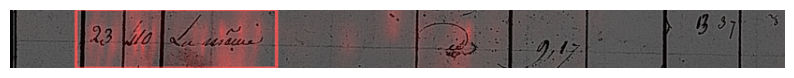

In [43]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt

def load_and_display_pair(folder_path, index):
    # Get the list of JSON files in the folder
    json_files = [file for file in os.listdir(folder_path) if file.endswith('.json')]

    # Ensure the provided index is valid
    if 0 <= index < len(json_files):
        # Get the JSON file path
        json_file_path = os.path.join(folder_path, json_files[index])

        # Load the JSON content
        with open(json_file_path, 'r', encoding='utf-8') as json_file:
            data = json.load(json_file)

        # Extract text and image paths from JSON
        text = data.get('text', '')
        image_path = data.get('attention_gif', '')

        # Print the text
        print(f"Text: {text}")

        # Load and display the image
        if image_path and os.path.exists(image_path):
            image = Image.open(image_path)
            plt.figure(figsize=(10, 10))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
        else:
            print("Image not found.")
    else:
        print("Invalid index.")

# Example usage: Provide the path to the folder containing JSON files and the desired index
folder_path = '/home/STual/inference/res2'
index_to_display = 25 # Replace with the desired index
load_and_display_pair(folder_path, index_to_display)

#Exemples intéressants:
#5 : insertion d'éléments dans la colonne propriétaire
#6 Hallucination